<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_9_Machine_Learning_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: To gain an understanding of Ensemble Methods

# **Outline:**

1.   **Data Handling and Pre-processing**
* Load the Wine dataset: https://archive.ics.uci.edu/dataset/109/wine
* Check the dataset to remove duplicate entries and handle missing feature values (through imputation or removal depending on the number of samples having missing feature values).
* Perform one-hot encoding of the dataset labels.
* Split the dataset into training, validation and test sets (70%-15%-15%)  
* Check the class distribution of the classes.
2. **Random Forest Classification**
* Implement random forest classification on this dataset from scratch.
* Report the classification metrics obtained on the test set (classification report and out-of-bag (OOB) error).  
* Compare the performance with scikit-learn's implementation of random forest using the same metrics (use the same hyperparameters such as the number of trees).
3. **Adaboost**
* Implement the Adaboost algorithm from scratch.
* Report the classification metrics.
* Compare the performance with Scikit-learn's implementation of Adaboost.












In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
# Load the Wine Dataset using sklearn.datasets

wine = load_wine()

In [ ]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
X = wine.data
y = wine.target

In [ ]:
# Create a DataFrame for easier handling and visualization
df_wine = pd.DataFrame(data=np.c_[X, y], columns=wine.feature_names + ['target'])
# We take the feature and target data from the load_wine() dataset, combine them column-wise using np.c_, and create a pandas DataFrame with appropriate column names.

In [ ]:
# a = np.array([1, 2, 3])
# b = np.array([4, 5, 6])

# result = np.c_[a, b]
# print(result)

In [ ]:
# 1. Dataset Overview
print("Dataset Overview:")
print(df_wine.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    

In [ ]:
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [ ]:
# Check for Duplicate Entries

print("Number of duplicate entries:", df_wine.duplicated().sum())

# If there are duplicates, remove them:
if df_wine.duplicated().sum() > 0:
    print("Removing duplicate entries...")
    df_wine.drop_duplicates(inplace=True)

# Count of the dataset

total_count = len(df_wine)
print("Total count :", total_count)

Number of duplicate entries: 0
Total count : 178


In [ ]:
#  Check for Missing Values

print("Missing values per column:\n", df_wine.isnull().sum())

Missing values per column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [ ]:
# If there are missing values, you can handle them (e.g., imputation or removal)
# Here are some examples:

# 1. Imputation with mean (for numerical features):
# df_wine.fillna(df_wine.mean(), inplace=True)

# 2. Removal of rows with missing values:
# df_wine.dropna(inplace=True)

# Count of the dataset

# total_count = len(df_wine)
# print("Total count :", total_count)

Class Distribution:
target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64


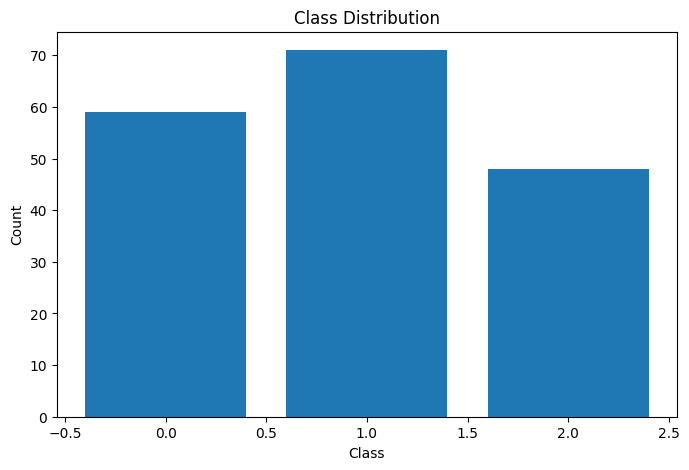

In [ ]:
print("Class Distribution:")

class_counts = df_wine['target'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.bar(df_wine['target'].value_counts().index, df_wine['target'].value_counts().values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

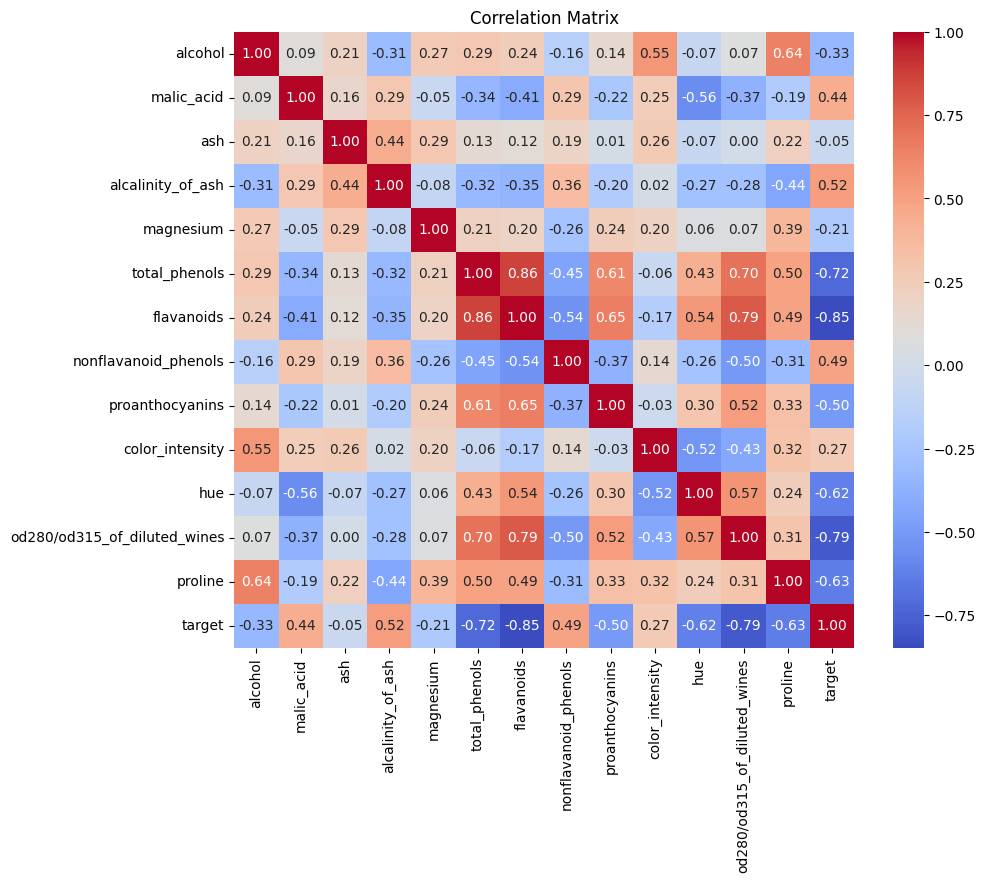

In [ ]:
#  Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# One-hot encode the target variable ('target')

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(df_wine[['target']])

In [ ]:
# Split the data (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 124
Validation set size: 27
Test set size: 27


**Implementation of Random Forest from scratch**

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


class DecisionTree:
    def __init__(self, max_depth=5, max_features='sqrt'):
        self.max_depth = max_depth # Maximum depth of the tree
        self.max_features = max_features # Number of features to consider for each split

    def fit(self, X, y):
        self.n_classes_ = y.shape[1] # Number of unique classes in the target variable
        self.n_features_ = X.shape[1] # Number of features in the dataset
        if self.max_features == 'sqrt':
            self.max_features = int(np.sqrt(self.n_features_)) # Calculate the number of features to use
        self.tree_ = self._grow_tree(X, y) # Build the tree

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape # Get the number of samples and features
        n_labels = y.shape[1] # Get the number of unique labels
        if (depth >= self.max_depth or n_labels == 1 or n_samples < 2): # Stopping criteria: Maximum depth reached, All samples have the same label, Not enough samples to split
            return self._most_common_label(y) # Return the most common label
        # Select random subset of features
        feature_indices = np.random.choice(n_features, size=self.max_features, replace=False)
        # Select best split from random subset
        best_gini = float('inf')
        best_idx, best_thr = None, None
        for idx in feature_indices:
            # thresholds, classes = zip(*sorted(zip(X[:, idx], y))) # Sort data by feature values
            sorted_indices = np.argsort(X[:, idx])  # Get indices that would sort the feature values
            thresholds = X[sorted_indices, idx]  # Sort the thresholds
            classes = y[sorted_indices]  # Sort the classes according to the sorted indices
            for i in range(1, n_samples):
                if any(classes[i - 1] != classes[i]): # Check if class changes between consecutive samples
                    thr = (thresholds[i - 1] + thresholds[i]) / 2
                    left = [y[j] for j in range(n_samples) if X[j, idx] < thr] # Samples in the left child
                    right = [y[j] for j in range(n_samples) if X[j, idx] >= thr] # Samples in the right child
                    gini = (len(left) * self._gini_impurity(left) + len(right) * self._gini_impurity(right)) / n_samples # Calculate weighted Gini impurity
                    if gini < best_gini: # Check if this split is better
                        best_gini = gini
                        best_idx = idx
                        best_thr = thr
      # i.e, we find the best split: randomly select a subset of features; iterate through the selected features and possible thresholds to find the split that minimizes the Gini impurity.
        if best_gini == float('inf'): # No split found
           return self._most_common_label(y) # Return the most common label
        # Recur
        left_idx = np.where(X[:, best_idx] < best_thr) # Indices of samples in the left child
        right_idx = np.where(X[:, best_idx] >= best_thr) # Indices of samples in the right child
        left = self._grow_tree(X[left_idx], y[left_idx], depth + 1) # Recursively build left subtree
        right = self._grow_tree(X[right_idx], y[right_idx], depth + 1) # Recursively build right subtree
        return (best_idx, best_thr, left, right) # Return the node (feature index, threshold, left child, right child)

    def _most_common_label(self, y):
        """
        Returns the index of the class with the highest count.
        """
        label_counts = np.sum(y, axis=0)
        return np.argmax(label_counts)

    def _gini_impurity(self, y):
        if len(y) == 0:
            return 0
        # Calculate class probabilities from one-hot encoded labels
        p = np.sum(y, axis=0) / len(y)
        return 1 - np.sum(p ** 2)

    def predict(self, X): # predicts the class labels for a given feature matrix X
        return [self._predict(inputs) for inputs in X] # Predict for each sample in X

    def _predict(self, inputs): # traverses the tree to make a prediction for a single sample.
        node = self.tree_ # Start at the root node
        while isinstance(node, tuple):
            idx, thr, left, right = node
            if inputs[idx] < thr:
                node = left
            else:
                node = right
        return node

class RandomForest:
    def __init__(self, n_trees=100, max_depth=5, max_features='sqrt'):
        self.n_trees = n_trees # Number of trees in the forest
        self.max_depth = max_depth # Maximum depth of each tree
        self.max_features = max_features # Number of features to consider for each split
        self.n_classes_ = None

    def fit(self, X, y):
        self.trees = []  # List to store the decision trees
        self.indices = [] # List to store the indices used for bootstrapping
        n_samples = X.shape[0] # Number of samples
        self.n_classes_ = y.shape[1]
        for _ in range(self.n_trees): # Iterate to create n_trees
            tree = DecisionTree(max_depth=self.max_depth, max_features=self.max_features) # Create a DecisionTree
            indices = np.random.choice(n_samples, size=n_samples, replace=True) # Bootstrap samples
            tree.fit(X[indices], y[indices]) # Train the tree on bootstrapped samples; For each tree, it generates a bootstrap sample (random sampling with replacement)
            self.trees.append(tree) # Add the trained tree to the list
            self.indices.append(indices) # Store the indices used for bootstrapping

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_trees))  # Array to store predictions from each tree
        for i, tree in enumerate(self.trees):  # Iterate over the trees
            predictions[:, i] = tree.predict(X)  # Get predictions from each tree

        # Aggregate predictions using majority voting
        majority_votes = np.array([np.bincount(row.astype(int)).argmax() for row in predictions])

        # Convert majority votes to one-hot encoded format
        one_hot_predictions = np.zeros((X.shape[0], self.n_classes_))
        for i, vote in enumerate(majority_votes):
            one_hot_predictions[i, vote] = 1

        return one_hot_predictions  # Return one-hot encoded predictions


def calculate_oob_error(X, y, forest):
    n_samples = X.shape[0] # Number of samples
    n_classes = y.shape[1] # Number of classes
    n_trees = forest.n_trees # Number of trees
    predictions = np.zeros((n_samples, n_trees)) # Array to store OOB predictions
    votes = np.zeros((n_samples, n_classes)) # Array to store votes for each class

    for i, tree in enumerate(forest.trees): # Iterate over trees
        indices = forest.indices[i] # Indices used to train the current tree
        oob_indices = np.array([idx for idx in range(n_samples) if idx not in indices]) # Out-of-bag indices
        if len(oob_indices) > 0: # If there are OOB samples
            predictions[oob_indices, i] = tree.predict(X[oob_indices]) # Predict for OOB samples
            for j, idx in enumerate(oob_indices): # Accumulate votes for each class
                votes[idx, int(predictions[idx, i])] += 1

    oob_predictions = np.argmax(votes, axis=1) # Get the class with the most votes
    oob_err = 1 - accuracy_score(np.argmax(y, axis=1), oob_predictions) # Calculate OOB error

    return oob_err


In [ ]:
# Create and train Random Forest with feature randomness
rf = RandomForest(n_trees=100, max_depth=5, max_features='sqrt')
rf.fit(X_train, y_train)

# Calculate out-of-bag error
oob_err = calculate_oob_error(X_train, y_train, rf)
print("Out-of-Bag Error:", oob_err)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Generate classification report
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))  # Convert one-hot to class indices
print("\nClassification Report:\n", report)

Out-of-Bag Error: 0.032258064516129004
Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot a decision tree
def plot_decision_tree(tree, feature_names, depth=0):
    if isinstance(tree, tuple):
        idx, thr, left, right = tree
        feature_name = feature_names[idx]
        # Plot decision node
        print('  ' * depth + f'if {feature_name} <= {thr}:')
        plot_decision_tree(left, feature_names, depth + 1)
        print('  ' * depth + f'else:')
        plot_decision_tree(right, feature_names, depth + 1)
    else:
        # Leaf node
        print('  ' * depth + f'class: {tree}')

# Select a few decision trees for visualization
trees_to_visualize = [0, 1, 2, 3, 4]  # You can adjust this list as needed

for i in trees_to_visualize:
    print(f"Decision Tree {i+1}:")
    plot_decision_tree(rf.trees[i].tree_, [f'Feature {i}' for i in range(20)])
    print()

Decision Tree 1:
if Feature 11 <= 2.19:
  if Feature 6 <= 1.4:
    if Feature 0 <= 12.325:
      if Feature 12 <= 795.0:
        class: 2
      else:
        class: 1
    else:
      class: 2
  else:
    class: 1
else:
  if Feature 12 <= 652.5:
    class: 1
  else:
    if Feature 4 <= 135.5:
      if Feature 0 <= 12.785:
        class: 1
      else:
        class: 0
    else:
      class: 1

Decision Tree 2:
if Feature 9 <= 3.82:
  class: 1
else:
  if Feature 7 <= 0.43:
    if Feature 10 <= 0.79:
      class: 2
    else:
      if Feature 12 <= 724.5:
        if Feature 0 <= 12.98:
          class: 1
        else:
          class: 0
      else:
        class: 0
  else:
    if Feature 4 <= 85.5:
      class: 1
    else:
      if Feature 10 <= 1.06:
        class: 2
      else:
        class: 0

Decision Tree 3:
if Feature 6 <= 2.665:
  if Feature 6 <= 1.2349999999999999:
    if Feature 8 <= 0.485:
      class: 1
    else:
      if Feature 12 <= 862.5:
        class: 2
      else:
       

SCIKIT-LEARN IMPLEMENTATION OF RANDOM FOREST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Create and train Random Forest with feature randomness
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='sqrt', random_state=42, oob_score=True)
rf.fit(X_train, y_train)

# Calculate out-of-bag error
oob_error = 1 - rf.oob_score_
print("Out-of-Bag Error:", oob_error)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Generate classification report
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))  # Convert one-hot to class indices
print("\nClassification Report:\n", report)

Out-of-Bag Error: 0.024193548387096753
Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



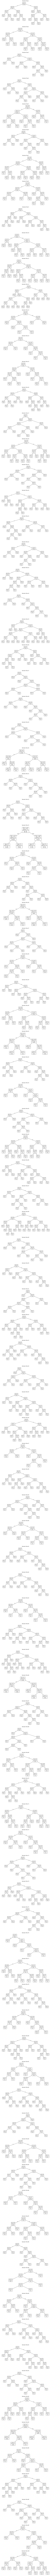

In [ ]:
# Plot decision trees properly one below the other
n_estimators = len(rf.estimators_)
fig, axes = plt.subplots(n_estimators, 1, figsize=(10, 5 * n_estimators))
for i, estimator in enumerate(rf.estimators_):
    plot_tree(estimator, ax=axes[i])
    axes[i].set_title('Decision Tree {}'.format(i+1))
plt.tight_layout()
plt.show()

**Implementation of Adaboost from scratch**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper functions
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m.
    Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation

    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int))) / sum(w_i)

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier.
    Arguments:
    error: error rate from weak classifier m
    '''
    return 0.5 * np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    '''
    Update individual weights w_i after a boosting iteration.
    Arguments:
    w_i: individual weights for each observation
    y: actual target value
    y_pred: predicted value by weak classifier
    alpha: weight of weak classifier used to estimate y_pred
    '''
    return w_i * np.exp(alpha * 2 * (np.not_equal(y, y_pred)).astype(int) - 1) / np.sum(w_i * np.exp(alpha * 2 * (np.not_equal(y, y_pred)).astype(int) - 1))

# Define AdaBoost class
class AdaBoost:
    def __init__(self):
        self.alphas = [] # List to store alphas
        self.G_M = [] # List to store weak classifiers
        self.M = None # Number of boosting rounds

    def fit(self, X, y, M):
        self.alphas = [] # Initialize the list for storing alpha values
        self.M = M # Store the number of boosting rounds

        m = len(X) # Get the number of samples in the dataset
        w_i = np.ones(m) / m  # Initialize sample weights uniformly

        for _ in range(M): # Iterate M times (boosting rounds)
            G_m = DecisionTreeClassifier(max_depth=1) # Create a decision stump (weak learner)
            G_m.fit(X, y, sample_weight=w_i) # Train the weak learner with sample weights
            y_pred = G_m.predict(X) # Make predictions on the training data

            error_m = compute_error(y, y_pred, w_i) # Calculate the weighted error rate
            alpha_m = compute_alpha(error_m) # Calculate the alpha value for the weak learner

            w_i = update_weights(w_i, alpha_m, y, y_pred) # Update the sample weights

            self.G_M.append(G_m) # Add the trained weak learner to the list
            self.alphas.append(alpha_m) # Add the alpha value to the list

        assert len(self.G_M) == len(self.alphas) # Check if the number of weak learners and alphas match

    def prediction(self, X):
        weak_preds = np.array([self.alphas[m] * self.G_M[m].predict(X) for m in range(self.M)])
        return np.sign(np.sum(weak_preds, axis=0))

In [ ]:
from sklearn.datasets import make_classification

# Step 1: Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df['Target'] = y

# 1. Dataset Overview
print("Dataset Overview:")
print(df.info())
print("Class Distribution:")
print(df['Target'].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   1000 non-null   float64
 1   Feature_1   1000 non-null   float64
 2   Feature_2   1000 non-null   float64
 3   Feature_3   1000 non-null   float64
 4   Feature_4   1000 non-null   float64
 5   Feature_5   1000 non-null   float64
 6   Feature_6   1000 non-null   float64
 7   Feature_7   1000 non-null   float64
 8   Feature_8   1000 non-null   float64
 9   Feature_9   1000 non-null   float64
 10  Feature_10  1000 non-null   float64
 11  Feature_11  1000 non-null   float64
 12  Feature_12  1000 non-null   float64
 13  Feature_13  1000 non-null   float64
 14  Feature_14  1000 non-null   float64
 15  Feature_15  1000 non-null   float64
 16  Feature_16  1000 non-null   float64
 17  Feature_17  1000 non-null   float64
 18  Feature_18  1000 non-null   float64
 19  Feature_19

In [ ]:
y = y * 2 - 1       # Original AdaBoost uses {1, -1} as class labels
df['Target'] = y
print("Class Distribution:")
print(df['Target'].value_counts())

Class Distribution:
Target
 1    500
-1    500
Name: count, dtype: int64


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Accuracy on test set: 0.875

Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.89      0.87        93
           1       0.90      0.86      0.88       107

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



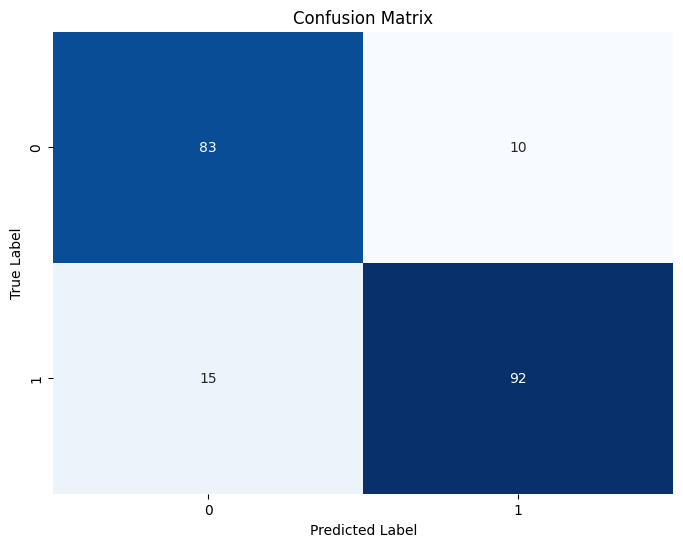

In [ ]:
ada_boost = AdaBoost()
ada_boost.fit(X_train, y_train, M=50)
y_pred = ada_boost.prediction(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy on test set:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on test set: 0.87
Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.90      0.87        93
           1       0.91      0.84      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



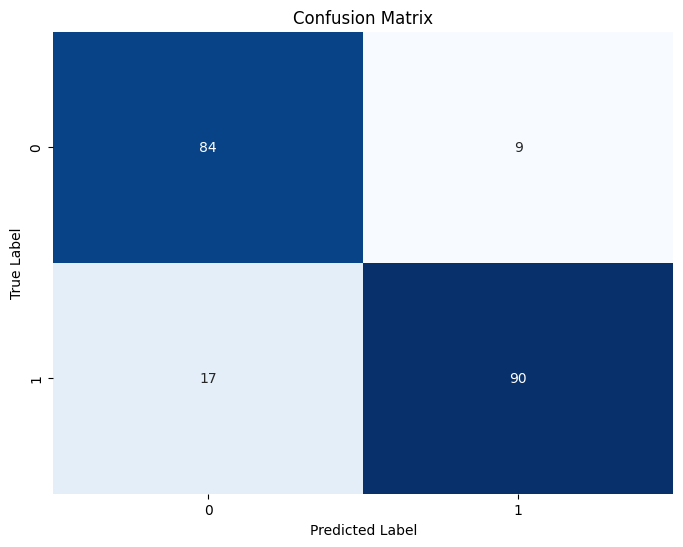

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns


ada_boost = AdaBoostClassifier()


ada_boost = AdaBoostClassifier(n_estimators=50)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", test_accuracy)

# Step 6: Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Assignment 9**: Random Forest Regression

Objective: This assignment provides a hands-on understanding of the Random Forest Regression algorithm. You will implement the algorithm from scratch and compare its performance with the scikit-learn implementation. You will also tune hyperparameters using cross-validation.

Dataset:  Diabetes dataset (https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

Tasks:

1. Data Preparation: [1 Marks]
*   Load the diabetes dataset using sklearn.datasets.load_diabetes.
*   Split the dataset into training and test sets with a 80%-20% ratio.

2. From-Scratch Implementation: [7 Marks]
* Implement the Random Forest Regression algorithm from scratch in Python.

3. Hyperparameter Tuning (From-Scratch Implementation): [5 Marks]
* Use GridSearchCV from scikit-learn to find the optimal number of trees for your from-scratch implementation.
* Evaluate the model with the best number of trees on the test set and report the Mean Squared Error (MSE) and the OOB error.

5. Scikit-learn Implementation: [5 Marks]
* Use RandomForestRegressor from scikit-learn to train a model on the diabetes dataset.
* Using cross-validation find the optimal number of trees for the scikit-learn implementation.
* Evaluate the model with the best number of trees on the test set and report the MSE and OOB.

6. Comparison and Visualization: [2 Marks]
* Compare the performance (MSE) of your from-scratch implementation with the scikit-learn implementation.
* Create scatter plots to visualize:
  * Predicted values vs. true values for your from-scratch implementation.
  * Predicted values vs. true values for the scikit-learn implementation.
* Display these plots side-by-side for easy comparison.